In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.shape

(214, 10)

In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
X=df.drop('Type',axis=1)
y=df['Type']

In [8]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


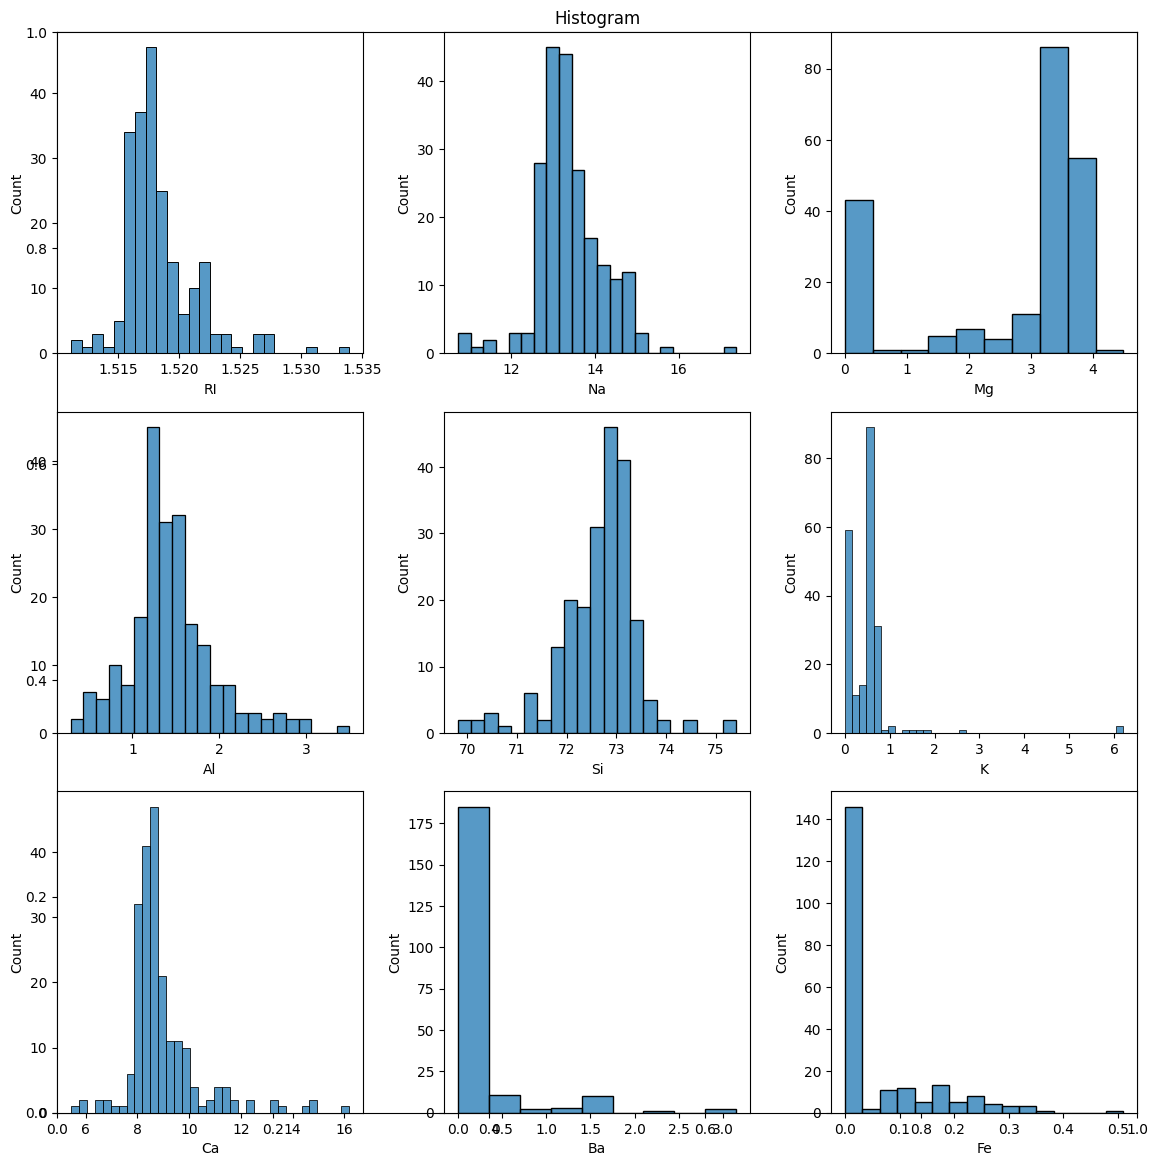

In [9]:
plt.figure(figsize=(12,12))
plt.title('Histogram')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(x=X[name])
    plt.tight_layout()
plt.show()

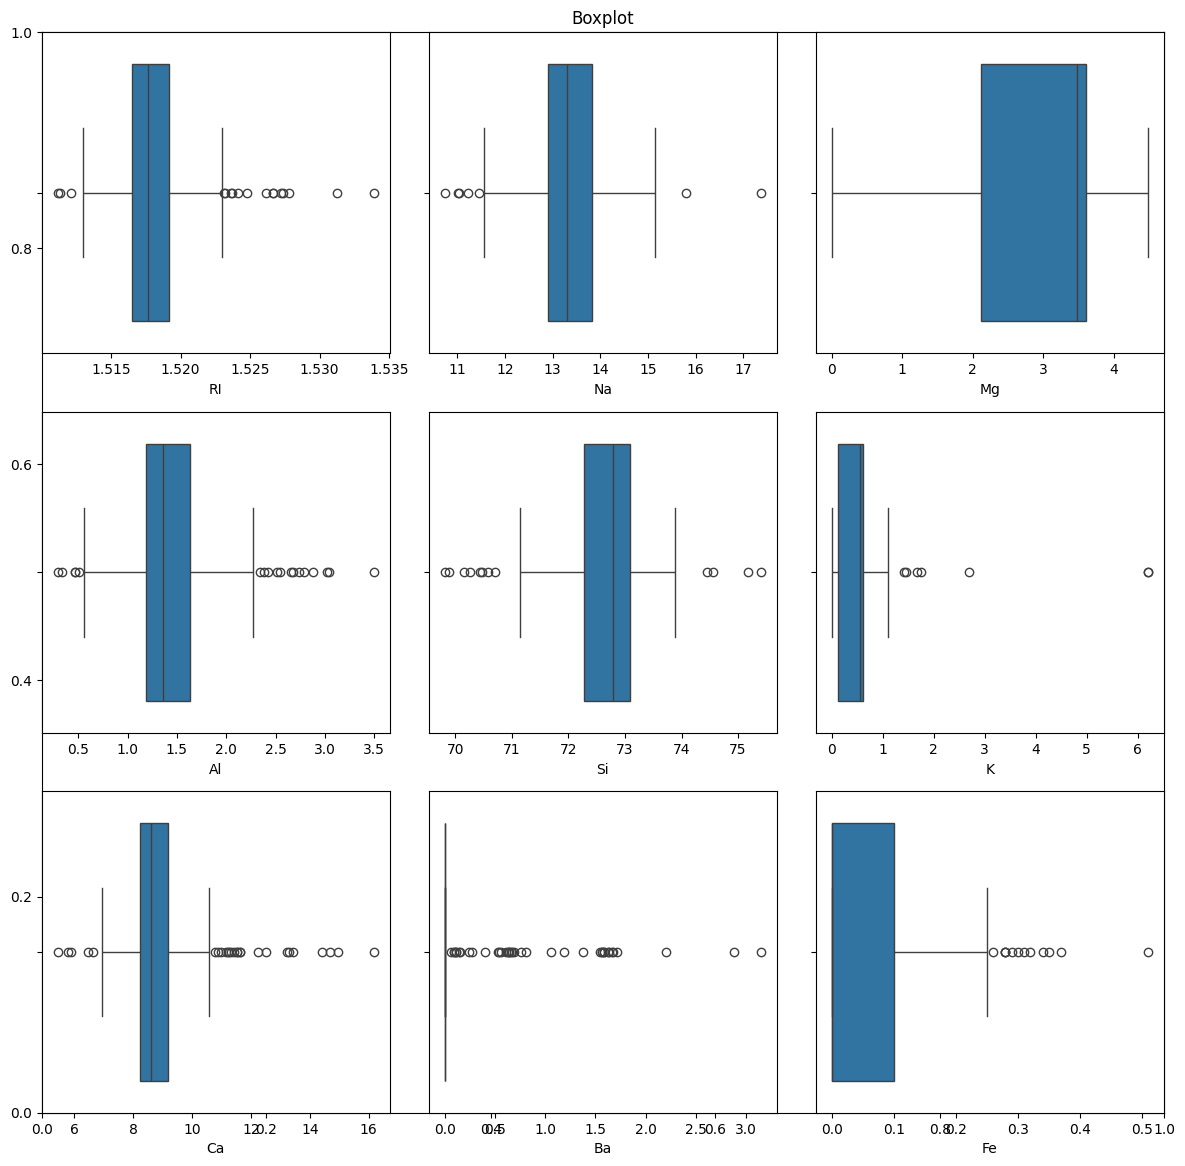

In [10]:
plt.figure(figsize=(12,12))
plt.title('Boxplot')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=X[name])
    plt.tight_layout()
plt.show()

In [11]:

for name in X.columns:
    Q1=X[name].quantile(0.25)
    Q3=X[name].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    X[name]=X[name].clip(lower_limit,upper_limit)

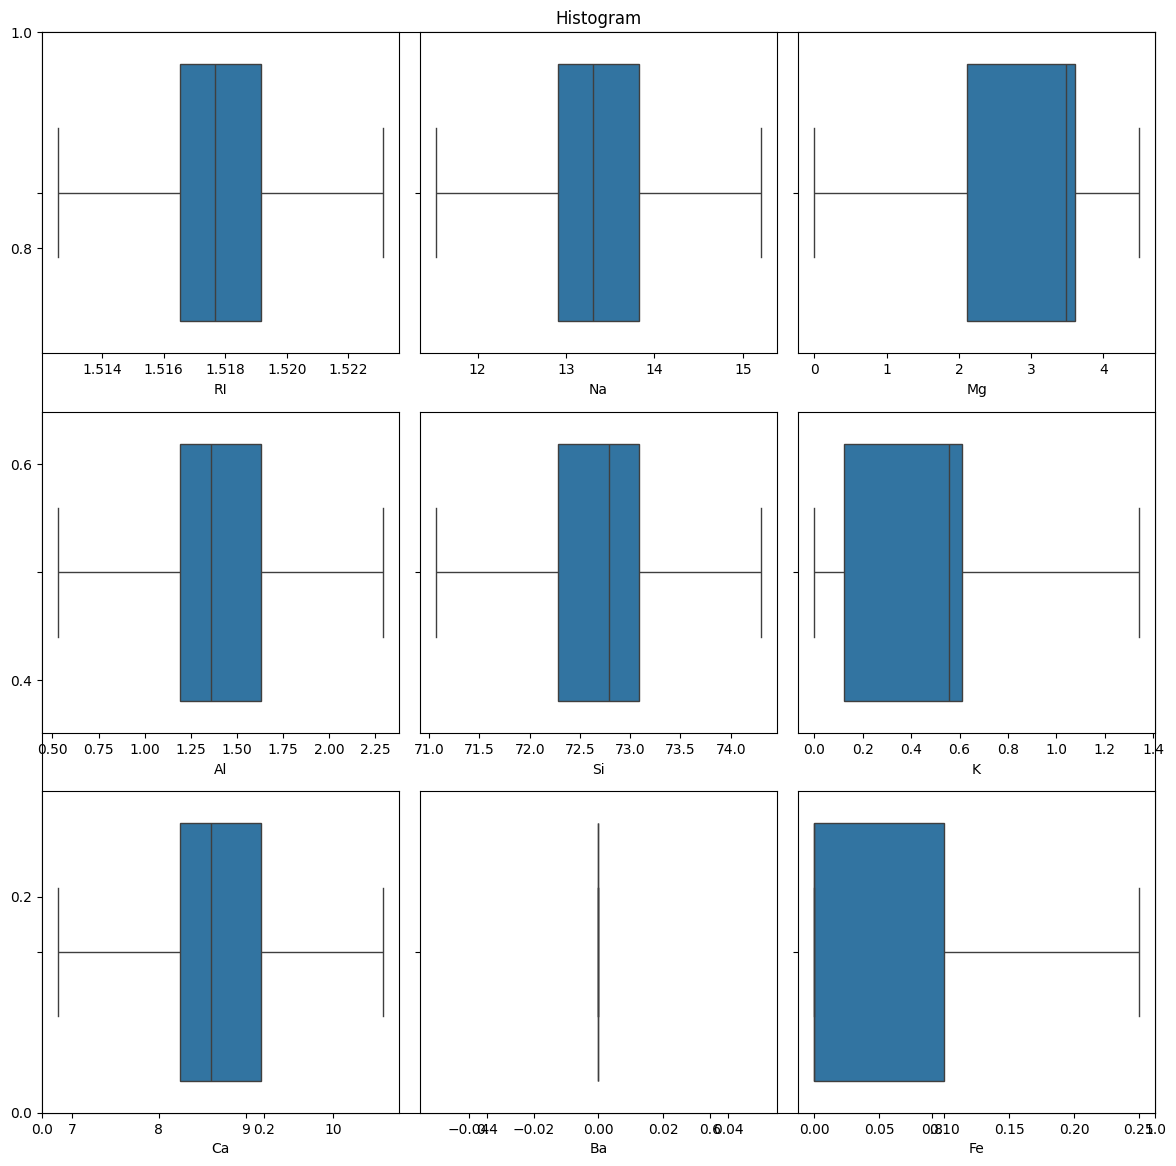

In [12]:
plt.figure(figsize=(12,12))
plt.title('Histogram')
for i,name in enumerate(X.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=X[name])
    plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [14]:
X_transformed=scale.fit_transform(X)

In [15]:
X_df=pd.DataFrame(X_transformed,columns=X.columns)

In [16]:
X_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,0.0,-0.619091
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,0.0,-0.619091
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,0.0,-0.619091
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,0.0,-0.619091


In [18]:
new_df=pd.concat([X_df,y],axis=1)

In [23]:
X=new_df.drop('Type',axis=1)
y=new_df['Type']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf=RandomForestClassifier(n_estimators=100,max_depth=None)

In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=rf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report

In [38]:
print("Accuracy Score:",round(accuracy_score(y_test,y_pred),2))

Accuracy Score: 0.86


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.85      0.79      0.81        14
           3       0.67      0.67      0.67         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.86        43
   macro avg       0.87      0.83      0.83        43
weighted avg       0.87      0.86      0.85        43



In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
base_estimator=DecisionTreeClassifier(max_depth=1)
ADB=AdaBoostClassifier(estimator=base_estimator)

In [64]:
import warnings 
warnings.filterwarnings('ignore')
ADB.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [65]:
y_pred1=ADB.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.8604651162790697

In [67]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.46      1.00      0.63        11
           2       0.15      0.14      0.15        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.40      0.25      0.31         8

    accuracy                           0.35        43
   macro avg       0.17      0.23      0.18        43
weighted avg       0.24      0.35      0.27        43



In [69]:
dict={'Algorithm':['Random Forest','Adaboost'],
'Accuracy':[.86,0.86]}

In [73]:
pd.DataFrame(dict).set_index('Algorithm')

,Accuracy
Algorithm,
Random Forest,0.086
Adaboost,0.860
